# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-an

In [2]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.40.0
gast                         0.4.0
google-auth                  2.21.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.56.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.24.0
ipython                      8.14.0
jax                          0.4.13
jedi 

In [1]:
import tensorflow as tf
import os

# 2. OpenCV Import

In [2]:
import cv2

# 3. Load Data

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
data = tf.keras.utils.image_dataset_from_directory('data',label_mode='categorical')

Found 352 files belonging to 4 classes.


In [46]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

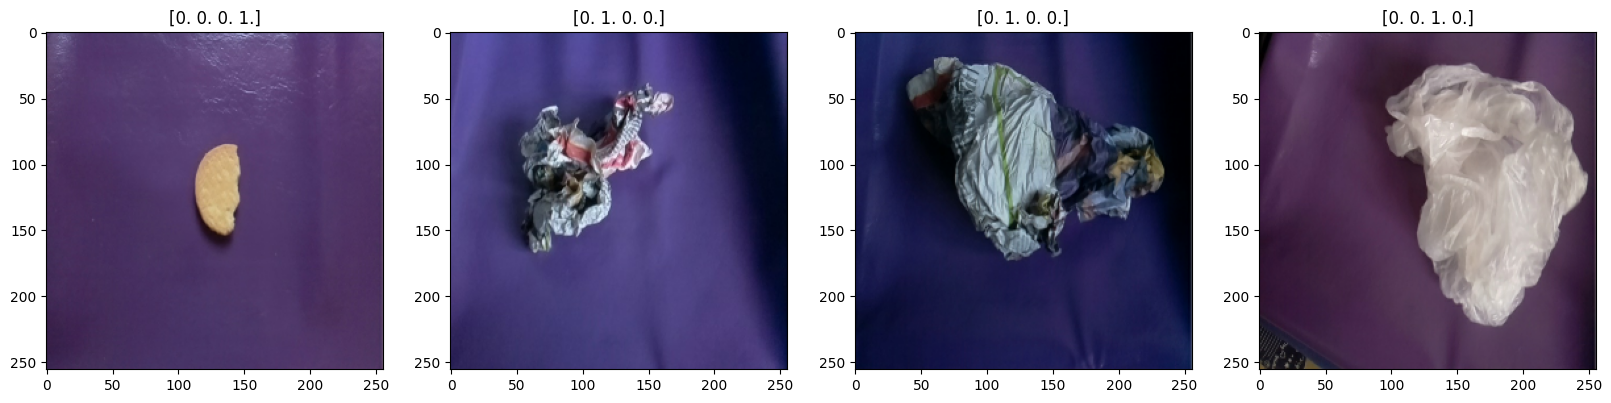

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [48]:
data = data.map(lambda x,y: (x/255, y))

In [49]:
data.as_numpy_iterator().next()

(array([[[[0.22193627, 0.15526961, 0.28860295],
          [0.21568628, 0.15686275, 0.28431374],
          [0.2447304 , 0.18590686, 0.30747548],
          ...,
          [0.        , 0.        , 0.        ],
          [0.01176471, 0.01764706, 0.01470588],
          [0.23137255, 0.23921569, 0.23529412]],
 
         [[0.21703431, 0.15036765, 0.28370097],
          [0.22849265, 0.16317402, 0.29387254],
          [0.24957108, 0.19074754, 0.31231618],
          ...,
          [0.        , 0.        , 0.        ],
          [0.01084559, 0.01672794, 0.01378676],
          [0.23137255, 0.23921569, 0.23529412]],
 
         [[0.22444853, 0.14601716, 0.28327206],
          [0.23566176, 0.16734068, 0.30122548],
          [0.26452205, 0.1978554 , 0.3253064 ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.01176471, 0.01764706, 0.01470588],
          [0.23431373, 0.24215686, 0.2382353 ]],
 
         ...,
 
         [[0.03106618, 0.04283088, 0.078125  ],
          [0.03376

# 5. Split Data

In [50]:
print(len(data))
print(int(len(data)*.7))
print(int(len(data)*.3))
print(int(len(data)*.1))

11
7
3
1


In [51]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)

In [52]:
train_size

7

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [54]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [56]:
model = Sequential()

In [57]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [58]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

# 7. Train

In [60]:
logdir='logs'

In [61]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [62]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 2s/step - loss: 1.5086 - accuracy: 0.4732 - val_loss: 1.2389 - val_accuracy: 0.3125
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 1.0517 - accuracy: 0.5446 - val_loss: 0.7685 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.7047 - accuracy: 0.7455 - val_loss: 0.7329 - val_accuracy: 0.7083
Epoch 4/20
7/7 [==============================] - 18s 2s/step - loss: 0.5625 - accuracy: 0.7768 - val_loss: 0.3939 - val_accuracy: 0.8333
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.4252 - accuracy: 0.8036 - val_loss: 0.3536 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.2791 - accuracy: 0.8616 - val_loss: 0.3142 - val_accuracy: 0.8229
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 0.2726 - accuracy: 0.8438 - val_loss: 0.3380 - val_accuracy: 0.8021
Epoch 8/20
7/7 [==================

# 8. Plot Performance

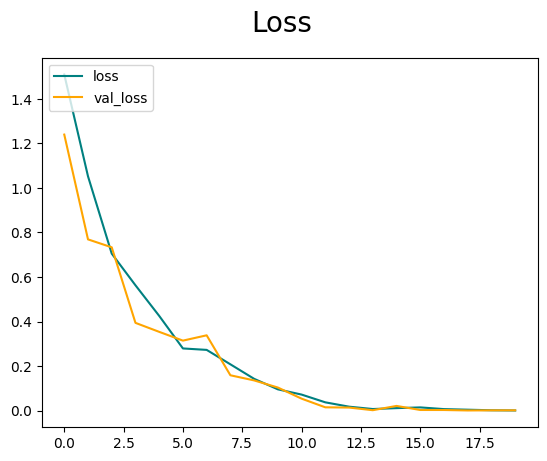

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

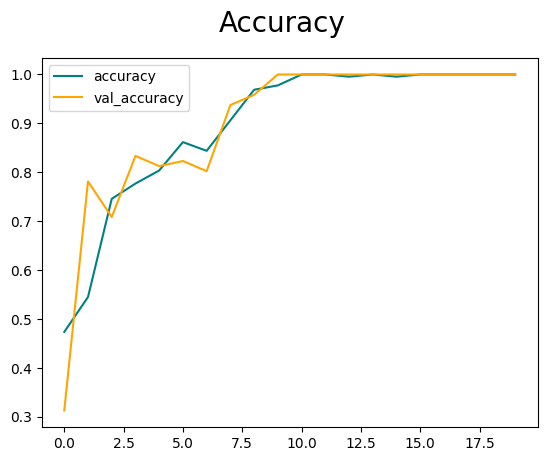

In [64]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [69]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [70]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [71]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 422ms/step


In [72]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()} , Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0 , Accuracy:1.0


# 10. Test

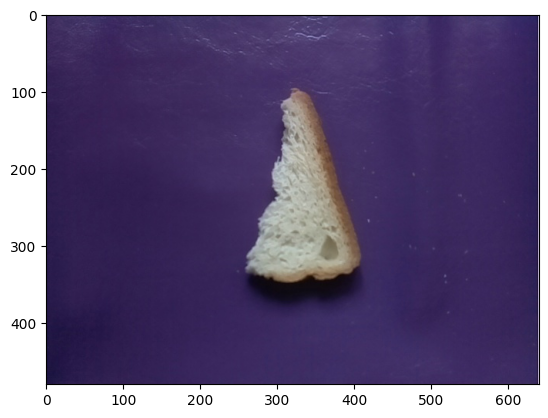

In [107]:
img = cv2.cvtColor(cv2.imread('103.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

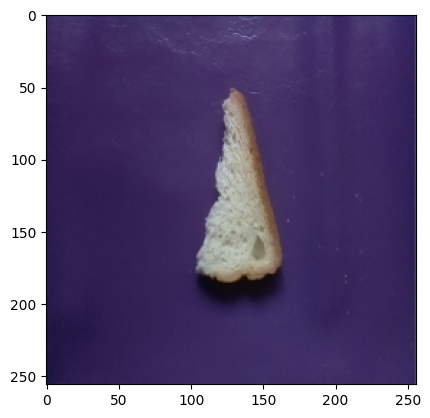

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [109]:
yhat = model.predict(np.expand_dims(resize/256, axis=0))

1/1 [==============================] - 0s 34ms/step


In [110]:
yhat

array([[1.8166994e-06, 5.2435706e-08, 4.3512041e-06, 9.9999380e-01]],
      dtype=float32)

In [111]:
predicted_class_index = np.argmax(yhat)

In [112]:
predicted_class_index

3

In [113]:
if predicted_class_index == 0:
    print(f'Null')
elif predicted_class_index == 2: 
    print(f'Polythene')
elif predicted_class_index == 3:
    print(f'Wastefood')
else:
    print(f'Paper')

Wastefood


# 11. Save the Model

In [114]:
from tensorflow.keras.models import load_model

In [115]:
model.save(os.path.join('models','imageclassifier.h5'))